In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2024-01-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2024_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-01-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,남구,8925,남구,750,9.17%,"8,550"
1,2024-01-11,간장,오복왕표 0.9ℓ 1병,7147,남구,7147,남구,0,0.0%,"7,147"
2,2024-01-11,갈치,60cm정도 500g 1마리(냉동),7633,남구,13200,남구,5567,72.93%,"10,417"
3,2024-01-11,고등어,30㎝정도 500g 1마리,5600,남구,5714,남구,114,2.04%,"5,657"
4,2024-01-11,달걀,오경슈퍼란60g정도 10개,3990,남구,4280,남구,290,7.27%,"4,135"
5,2024-01-11,닭고기,육계 1.0㎏,8990,남구,10600,남구,1610,17.91%,"9,795"
6,2024-01-11,대파,1.0㎏,2980,남구,5544,남구,2564,86.04%,"4,262"
7,2024-01-11,돼지고기,삼겹살 500g,16800,남구,18450,남구,1650,9.82%,"17,625"
8,2024-01-11,두부,500g 판두부(국산포장두부 420g) 1모,3033,남구,5194,남구,2161,71.25%,"4,114"
9,2024-01-11,라면,신라면 120g 1봉지,780,남구,780,남구,0,0.0%,780


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2024-04-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2024_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-04-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5625,남구,9675,남구,4050,72.0%,"7,650"
1,2024-04-11,간장,오복왕표 0.9ℓ 1병,5294,남구,7147,남구,1853,35.0%,"6,221"
2,2024-04-11,갈치,60cm정도 500g 1마리(냉동),5980,남구,9500,남구,3520,58.86%,"7,740"
3,2024-04-11,고등어,30㎝정도 500g 1마리,4975,남구,7142,남구,2167,43.56%,"6,059"
4,2024-04-11,달걀,오경슈퍼란60g정도 10개,3990,남구,4380,남구,390,9.77%,"4,185"
5,2024-04-11,닭고기,육계 1.0㎏,7990,남구,8725,남구,735,9.2%,"8,358"
6,2024-04-11,대파,1.0㎏,1484,남구,3655,남구,2171,146.29%,"2,570"
7,2024-04-11,돼지고기,삼겹살 500g,10950,남구,19400,남구,8450,77.17%,"15,175"
8,2024-04-11,두부,500g 판두부(국산포장두부 420g) 1모,3033,남구,6056,남구,3023,99.67%,"4,545"
9,2024-04-11,라면,신라면 120g 1봉지,780,남구,780,남구,0,0.0%,780


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2024-07-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2024_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-07-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,남구,9675,남구,750,8.4%,"9,300"
1,2024-07-11,간장,오복왕표 0.9ℓ 1병,7147,남구,9684,남구,2537,35.5%,"8,416"
2,2024-07-11,갈치,60cm정도 500g 1마리(냉동),3980,남구,13200,남구,9220,231.66%,"8,590"
3,2024-07-11,고등어,30㎝정도 500g 1마리,4350,남구,6250,남구,1900,43.68%,"5,300"
4,2024-07-11,달걀,오경슈퍼란60g정도 10개,3990,남구,4380,남구,390,9.77%,"4,185"
5,2024-07-11,닭고기,육계 1.0㎏,8725,남구,8990,남구,265,3.04%,"8,858"
6,2024-07-11,대파,1.0㎏,2580,남구,3544,남구,964,37.36%,"3,062"
7,2024-07-11,돼지고기,삼겹살 500g,12450,남구,26900,남구,14450,116.06%,"19,675"
8,2024-07-11,두부,500g 판두부(국산포장두부 420g) 1모,3033,남구,6056,남구,3023,99.67%,"4,545"
9,2024-07-11,라면,신라면 120g 1봉지,780,남구,780,남구,0,0.0%,780


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2024-10-17"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2024_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-10-17,가루비누,"세탁용세제(LG테크),가루형,3.0kg",9675,남구,9675,남구,0,0.0%,"9,675"
1,2024-10-17,간장,오복왕표 0.9ℓ 1병,7888,남구,9684,남구,1796,22.77%,"8,786"
2,2024-10-17,갈치,60cm정도 500g 1마리(냉동),5980,남구,13200,남구,7220,120.74%,"9,590"
3,2024-10-17,고등어,30㎝정도 500g 1마리,3980,남구,6875,남구,2895,72.74%,"5,428"
4,2024-10-17,달걀,오경슈퍼란60g정도 10개,3990,남구,4380,남구,390,9.77%,"4,185"
5,2024-10-17,닭고기,육계 1.0㎏,7990,남구,9100,남구,1110,13.89%,"8,545"
6,2024-10-17,대파,1.0㎏,2980,남구,3322,남구,342,11.48%,"3,151"
7,2024-10-17,돼지고기,삼겹살 500g,13950,남구,21900,남구,7950,56.99%,"17,925"
8,2024-10-17,두부,500g 판두부(국산포장두부 420g) 1모,3033,남구,6056,남구,3023,99.67%,"4,545"
9,2024-10-17,라면,신라면 120g 1봉지,780,남구,780,남구,0,0.0%,780


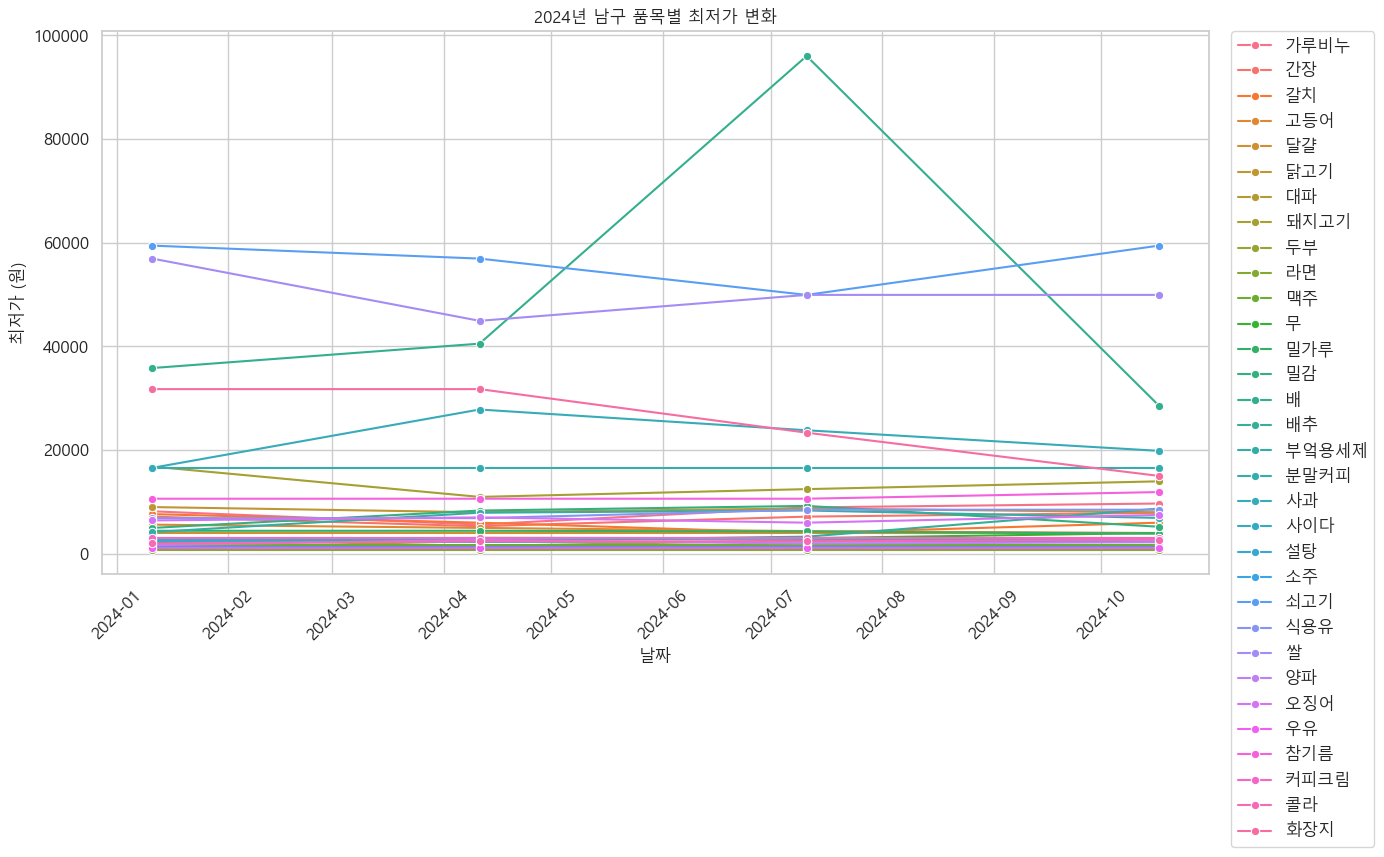

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2024_1q.csv")
q2 = pd.read_csv("남구2024_2q.csv")
q3 = pd.read_csv("남구2024_3q.csv")
q4 = pd.read_csv("남구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 남구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
# plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
# plt.tight_layout()
# plt.show()
# ⭐ 범례를 그래프 바깥 오른쪽으로 이동
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=9,
    ncol=1,
    prop=font_prop,
    borderaxespad=0
)

plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("남구2024_min.csv", index=False, encoding="utf-8-sig")

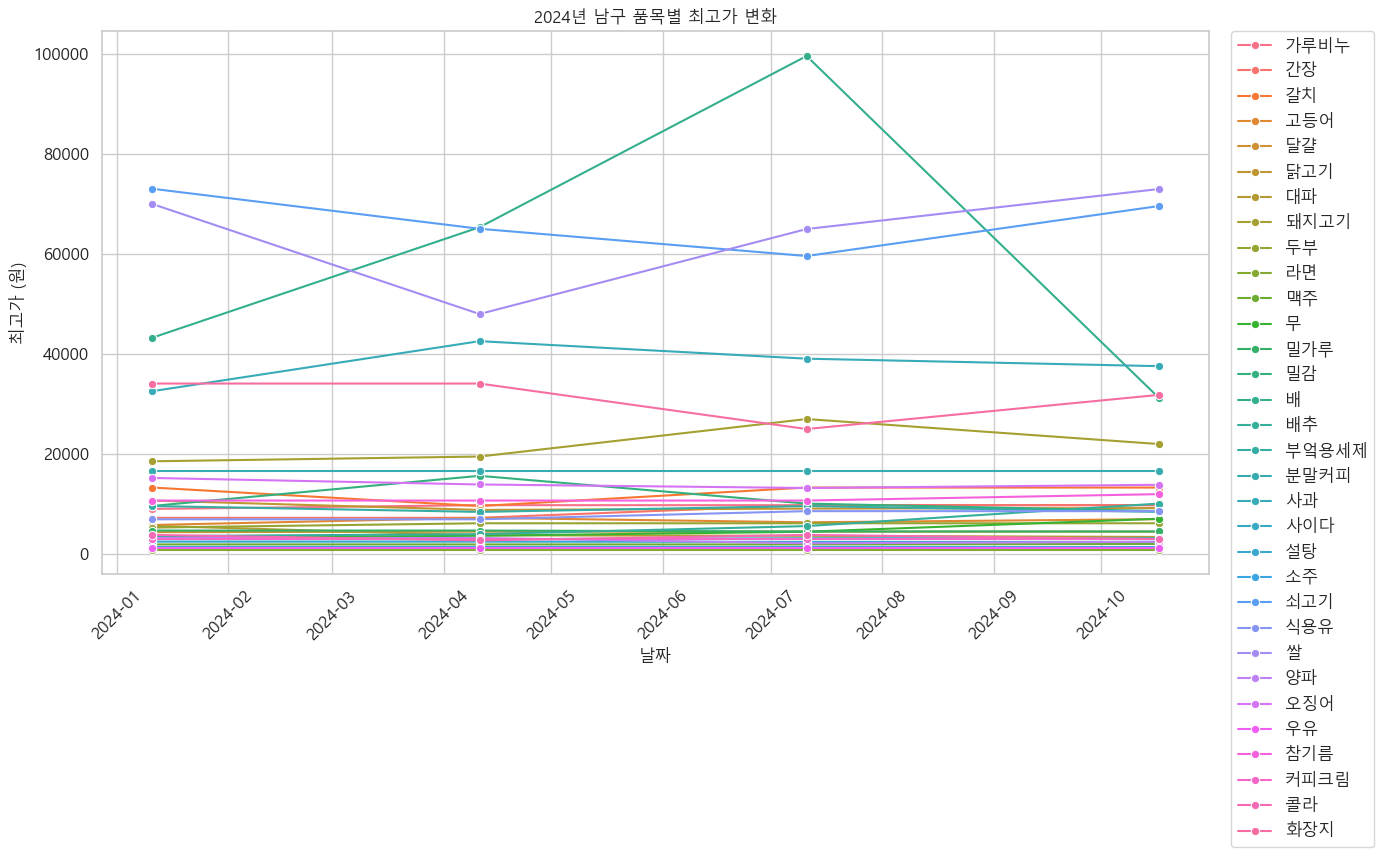

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2024_1q.csv")
q2 = pd.read_csv("남구2024_2q.csv")
q3 = pd.read_csv("남구2024_3q.csv")
q4 = pd.read_csv("남구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 남구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
# plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
# plt.tight_layout()
# plt.show()
# ⭐ 범례를 그래프 바깥 오른쪽으로 이동
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=9,
    ncol=1,
    prop=font_prop,
    borderaxespad=0
)

plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("남구2024_max.csv", index=False, encoding="utf-8-sig")